# Análisis Numérico de EDPs : Ecuación de Poisson con Diferencias Finitas

## Ignacio Garach Vélez

## Ecuación de Poisson bidimensional
$$\Delta u = f \textrm{ en } Ω$$
$$u=0 \textrm{ en } \partial Ω$$

En este caso, debemos discretizar en 2 dimensiones y calcular una cuadrícula de nodos. Vamos a trabajar en el cuadrado $[0, 1] \times [0, 1]$. Para aproximar el laplaciano en estos nodos, la forma más sencilla es aproximar la segunda derivada en los dos ejes. Aunque existen más "kernels" de este estilo para calcular la derivada en función de los valores de los nodos adyacentes. Todas estas aproximaciones tiene un interesante uso en el ámbito de la visión por computador, muchas redes neuronales profundas los utilizan en sus primeras capas para extraer características de las imágenes. 

### Método
Escogemos un número de nodos N y M en cada eje, suele ser razonable tomar $N=M$ y calculamos $h=\frac{1}{N}$
$$ \frac{u_{i+1,j} + u_{i-1,j} + u_{i,j-1} + u_{i,j+1} - 4u_{i,j}}{h^2} =f_{ij}, $$


Implementamos mediante matrices dispersas:

In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import diags
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [12]:
def solvePoison(f, Np, ini=0.0, fin=1.0, ua=0, ub=0):
  N=Np
  a=ini
  L=fin

  h = (L-a)/N
  nodosx = [a+h*i for i in np.arange(N+1)]
  nodosy = [a+h*i for i in np.arange(N+1)]

  F = np.array([f(x, y) for x in nodosx for y in nodosy])

  adyacente = np.delete(np.tile(np.append(np.ones(N), 0), N+1), N**2+2*N)

  diagonals = [-4*np.ones((N+1)*(N+1)), adyacente, adyacente, np.ones((N+1)*(N+1)-(N+1)), np.ones((N+1)*(N+1)-(N+1))]
  M = diags(diagonals, (0, 1, -1, N+1, -N-1)).toarray()
  #print(M)


  U = h**2*np.linalg.inv(M)@F

  return nodosx, nodosy, U

Resolución para $f(x, y)=1$ en $Ω = [0,1] × [0, 1]$ y $N=M=50$

In [13]:
def f(x, y):
  return 1

X, Y, result = solvePoison(f, 50)

Debemos implementar una función que represente gráficamente el resultado del cálculo:

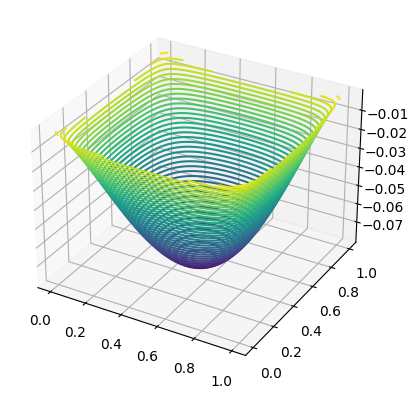

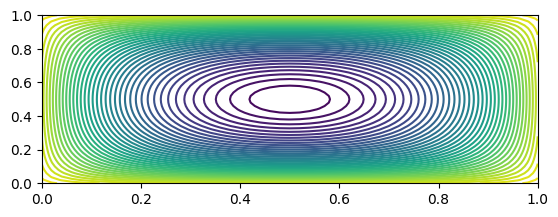

In [14]:
def plotSurface(X, Y, result):  
  N=len(X)
  result = result.reshape((N, N))
  from mpl_toolkits import mplot3d
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, result, N, cmap='viridis')
  plt.figure().add_subplot(2, 1, 2)
  plt.contour(X, Y, result, N, cmap='viridis')

plotSurface(X, Y, result)